#**0. Cargue las librerias que usará en el proyecto**
Recuerde usar librerias para graficar, numpy y pandas, entre otras.

In [ ]:
# Importamos Scikit-Learn.
import sklearn

# Librerías de utilidad para manipulación de datos.
import pandas as pd
import numpy as np
import scipy

# Ignorar advertencias del código.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#TEST_CELL
# Librerías de utilidad para visualización de datos.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el formato por defecto de la 
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 110
mpl.rcParams['figure.figsize'] = (8, 6)
sns.set_theme()

from scipy import stats
import scipy

In [ ]:
#TEST_CELL
# Versiones de las librerías usadas.

!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('SciPy', scipy.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.10.11
NumPy 1.22.4
Pandas 1.5.3
SciPy 1.10.1
Matplotlib 3.7.1
Seaborn 0.12.2
Scikit-learn 1.2.2


#**Objetivo**

El objetivo principal del presente proyecto es determinar mediante herramientas de Machine Learning el apagado no programado del H501 de la refineria de Apiay.

1.  Implementar metodologias de machine learning para analisis predictivo de tipo clasificacion y descriptivo de tipo analisis de componentes principales

2. prevenir paradas de planta no programadas

3. Asegurar la continuidad del servicio y la calidad de los productos asegurando sus especificaciones.

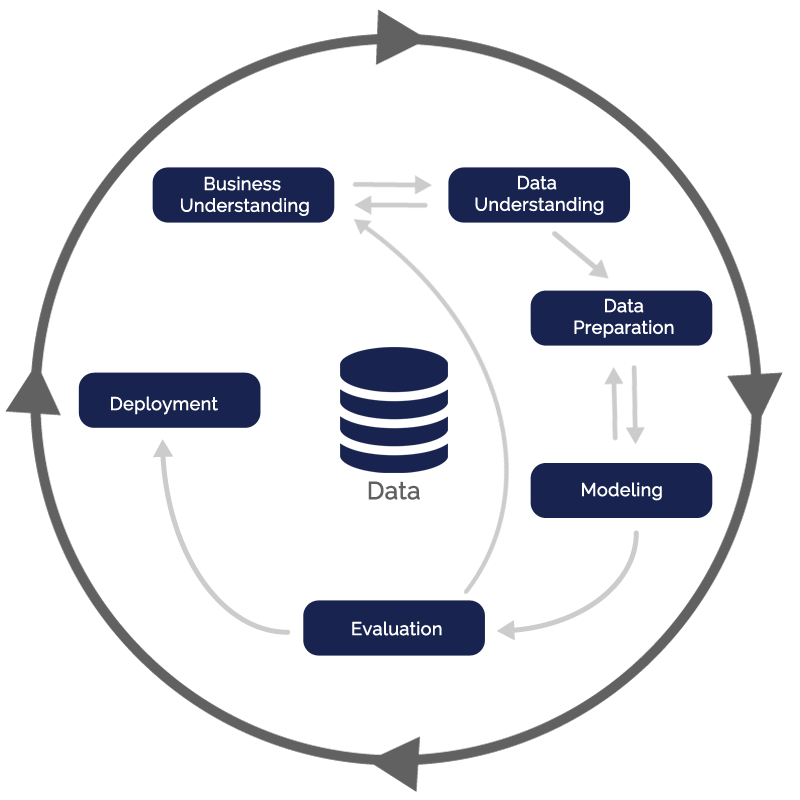

#**Contenido**

#**1. Entendimiento del negocio**

---



El crudo almacenado en los tanques K-501 a 150° F, es tomado por la succión de las bombas P-501, se precalienta
hasta 210° F en el lado casco de los E-516 con gasóleo y, hasta 410° F aproximadamente en los tubos de los E-503
A/B con Asfalto producto de la T-504.

Posteriormente, el flujo de crudo entra a más o menos 80 PSI a los serpentines de la sección de convección y luego
pasa por los serpentines de la sección radiante del H-501, en donde se calienta hasta 730° F. El crudo caliente sale
del horno y va al plato 23 de la T-501 por la línea de transferencia, parcialmente vaporizado. La temperatura de salida
del horno se controla automáticamente con el TIC- 5101, que toma la señal en la línea de salida del horno y opera en
cascada con el PIC-5001, regulando la presión del gas combustible a los quemadores.

Sobre la sección de convección del H-501, se halla un serpentín en el que se sobrecalienta un flujo de vapor de más
o menos 3200 libras/hora a 150 PSIG, hasta 760° F y al mismo tiempo, sirve de enfriamiento a los gases de
combustión del horno. Este vapor se usa posteriormente para despojo en el fondo de las T-501/504 y como vapor
motriz en los eyectores del sistema de vacío.

En la chimenea del horno se encuentra la compuerta o dámper, la cual sirve para regular el tiro natural del horno.
Esta compuerta se opera manualmente desde el piso y debe ser regulada en conjunto con los registros de aire de cada uno de los quemadores para controlar el exceso de aire y obtener la eficiencia máxima del horno. Este exceso de oxígeno debe ser de 2 a 4%. La temperatura de salida del H-501 determina las condiciones de la destilación atmosférica y al vacío, afectando especificaciones de calidad del asfalto como Penetración y Punto de Ignición o Chispa, factores importantes teniendo en cuenta que este es el producto principal de la planta.

En caso de ocurrir una parada de planta no programada, se debe de tener la agilidad con los operadores y en algunos casos recurrir al apoyo de mantenimiento para volver a poner en marcha el Horno, durante el tiempo que dure por fuera el Horno, los productos y su calidad se ven impactados dado que la temperatura que deberia alcanzar no se logra y se debe redirigir a los tanques de productos fuera de especificaciones, para el caso del asfalto el TK512 y para los productos livianos el TK508, esta coordinacion debe ser agil ya que si en cierto tiempo no se logra encender el Horno se debe apagar la planta por completo.

**
Añadir informacion del SIS
**

*a. Objetivos del negocio*
------

*Reducir la cantidad de diferidas por ventas de productos.
*Evitar apagados no programados
*Incrementar las ventas de productos


*b. Metas del proyecto de Machine Learning*
------

*   Crear una integracion de datos entre el H501 y los datos del SIS para asegurar la correlacion con la variable de salida (Apagado del horno)

*  Limpieza de datos.

*  Realizar analisis exploratorio y estadistico de los datos

* Realizar imputacion a los datos vacios o nulos segun la estrategia definida.

*a. Recolección inicial de datos*
------


In [ ]:
### EJECUTAR ESTA CELDA SIN MODIFICARLA. SI FALLA, DEBE SEGUIR EL PROCEDIMIENTO DESCRITO ANTES.
df_H501 = pd.read_excel("h501a.xlsx")
df_H501

,Fecha,Hora,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,...,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida,Salida2
0,2022-10-20,01:00:00,2310.430,0.283046,666.733,37.1801,85.1166,1700.18,145.197,200.103,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.067,En linea,En linea
1,2022-10-20,02:00:00,2299.540,0.274470,666.515,37.0941,85.0059,1699.97,145.019,201.296,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.901,En linea,En linea
2,2022-10-20,03:00:00,2292.490,0.267280,666.297,37.0145,84.8952,1699.76,144.840,202.060,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.259,En linea,En linea
3,2022-10-20,04:00:00,2291.760,0.272624,666.079,36.9922,84.7845,1699.54,144.661,201.014,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.323,En linea,En linea
4,2022-10-20,05:00:00,2290.190,0.280965,665.861,36.9836,84.6738,1699.33,144.482,199.553,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.312,En linea,En linea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,2023-03-26,20:00:00,2352.590,-0.024609,653.622,33.9068,0.0000,1450.46,144.185,200.379,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.965,En linea,En linea
3788,2023-03-26,21:00:00,2346.390,-0.024609,654.064,33.9072,0.0000,1450.34,144.400,199.932,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.018,En linea,En linea
3789,2023-03-26,22:00:00,2310.440,-0.024609,654.505,33.9075,0.0000,1450.22,144.614,199.740,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.522,En linea,En linea
3790,2023-03-26,23:00:00,2285.380,-0.024609,654.929,33.9078,0.0000,1450.10,144.228,199.550,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.434,En linea,En linea


In [ ]:
def fill_missing_val(df_IH01):
    df_IH01.fillna(method='ffill', inplace=True)
    return df_IH01

In [ ]:
fill_missing_val(df_H501)

,Fecha,Hora,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,...,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida,Salida2
0,2022-10-20,01:00:00,2310.430,0.283046,666.733,37.1801,85.1166,1700.18,145.197,200.103,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.067,En linea,En linea
1,2022-10-20,02:00:00,2299.540,0.274470,666.515,37.0941,85.0059,1699.97,145.019,201.296,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.901,En linea,En linea
2,2022-10-20,03:00:00,2292.490,0.267280,666.297,37.0145,84.8952,1699.76,144.840,202.060,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.259,En linea,En linea
3,2022-10-20,04:00:00,2291.760,0.272624,666.079,36.9922,84.7845,1699.54,144.661,201.014,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.323,En linea,En linea
4,2022-10-20,05:00:00,2290.190,0.280965,665.861,36.9836,84.6738,1699.33,144.482,199.553,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.312,En linea,En linea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,2023-03-26,20:00:00,2352.590,-0.024609,653.622,33.9068,0.0000,1450.46,144.185,200.379,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.965,En linea,En linea
3788,2023-03-26,21:00:00,2346.390,-0.024609,654.064,33.9072,0.0000,1450.34,144.400,199.932,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.018,En linea,En linea
3789,2023-03-26,22:00:00,2310.440,-0.024609,654.505,33.9075,0.0000,1450.22,144.614,199.740,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.522,En linea,En linea
3790,2023-03-26,23:00:00,2285.380,-0.024609,654.929,33.9078,0.0000,1450.10,144.228,199.550,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.434,En linea,En linea


*b. Descripción de los datos*
------


In [ ]:
df_H501.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3792 entries, 0 to 3791
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 3792 non-null   datetime64[ns]
 1   Hora                  3792 non-null   object        
 2   CALEN_CRUDO_FIT_5015  3792 non-null   float64       
 3   H501_PI_5001A         3792 non-null   float64       
 4   H501_TI_5035          3792 non-null   float64       
 5   H501_ZI_5208          3792 non-null   float64       
 6   LECTURA_FIC_5003      3792 non-null   float64       
 7   LECTURA_FRC_5002A     3792 non-null   float64       
 8   LECTURA_PIAHL_5004    3792 non-null   float64       
 9   LECTURA_PIC_5014      3792 non-null   float64       
 10  LECTURA_TE_5001_3     3792 non-null   float64       
 11  LECTURA_TI_5001_16    3792 non-null   float64       
 12  LECTURA_TI_5001_17    3792 non-null   float64       
 13  LECTURA_TI_5001_2 

In [ ]:
df_H501 = df_H501.iloc[:, 2:]
df_H501

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida,Salida2
0,2310.430,0.283046,666.733,37.1801,85.1166,1700.18,145.197,200.103,304.043,575.308,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.067,En linea,En linea
1,2299.540,0.274470,666.515,37.0941,85.0059,1699.97,145.019,201.296,304.187,575.845,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.901,En linea,En linea
2,2292.490,0.267280,666.297,37.0145,84.8952,1699.76,144.840,202.060,304.331,576.384,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.259,En linea,En linea
3,2291.760,0.272624,666.079,36.9922,84.7845,1699.54,144.661,201.014,304.442,576.882,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.323,En linea,En linea
4,2290.190,0.280965,665.861,36.9836,84.6738,1699.33,144.482,199.553,304.295,576.867,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.312,En linea,En linea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,2352.590,-0.024609,653.622,33.9068,0.0000,1450.46,144.185,200.379,311.779,576.747,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.965,En linea,En linea
3788,2346.390,-0.024609,654.064,33.9072,0.0000,1450.34,144.400,199.932,311.908,577.058,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.018,En linea,En linea
3789,2310.440,-0.024609,654.505,33.9075,0.0000,1450.22,144.614,199.740,312.037,577.362,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.522,En linea,En linea
3790,2285.380,-0.024609,654.929,33.9078,0.0000,1450.10,144.228,199.550,312.184,577.924,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.434,En linea,En linea


In [ ]:
df_H501 = df_H501.drop(['Salida'], axis=1)

In [ ]:
df_H501

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_ZSO5101A,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida2
0,2310.430,0.283046,666.733,37.1801,85.1166,1700.18,145.197,200.103,304.043,575.308,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.067,En linea
1,2299.540,0.274470,666.515,37.0941,85.0059,1699.97,145.019,201.296,304.187,575.845,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.901,En linea
2,2292.490,0.267280,666.297,37.0145,84.8952,1699.76,144.840,202.060,304.331,576.384,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.259,En linea
3,2291.760,0.272624,666.079,36.9922,84.7845,1699.54,144.661,201.014,304.442,576.882,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.323,En linea
4,2290.190,0.280965,665.861,36.9836,84.6738,1699.33,144.482,199.553,304.295,576.867,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.312,En linea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,2352.590,-0.024609,653.622,33.9068,0.0000,1450.46,144.185,200.379,311.779,576.747,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.965,En linea
3788,2346.390,-0.024609,654.064,33.9072,0.0000,1450.34,144.400,199.932,311.908,577.058,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.018,En linea
3789,2310.440,-0.024609,654.505,33.9075,0.0000,1450.22,144.614,199.740,312.037,577.362,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.522,En linea
3790,2285.380,-0.024609,654.929,33.9078,0.0000,1450.10,144.228,199.550,312.184,577.924,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.434,En linea


*c. Exploración de los datos*
------


En este paso se deben revisar variables nulas y detectar posibles errores (se deben utilizar gráficas y matrices para este paso)

In [ ]:
#Obtenemos la estadistica descriptiva de las variables numericas
df_H501.describe()

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_QUEMADOR4_ON,H501_ZSO5101A,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101
count,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,...,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000
mean,2117.388045,0.052503,571.364774,36.035763,33.807016,1388.881310,138.574155,170.561799,302.367442,513.152960,...,0.627062,0.870206,0.870206,0.869765,0.869763,0.645307,0.723101,0.807474,0.649651,596.432098
std,497.414280,0.585140,142.340353,29.401328,62.947122,401.407581,29.244511,54.052964,32.707941,101.462992,...,0.482356,0.334472,0.334470,0.334829,0.334828,0.477252,0.446082,0.392745,0.476047,201.230893
min,0.000000,-0.205143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2073.715000,-0.104766,502.596500,30.843900,0.000000,1350.087500,143.509750,128.923000,299.596250,409.455000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,400.075250
50%,2296.065000,-0.066853,638.310500,31.931600,0.000000,1450.280000,144.651000,199.597000,306.978000,572.800500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,719.938500
75%,2368.367500,0.289482,649.826250,34.916000,79.701475,1600.110000,145.788000,200.255250,312.071750,575.969750,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,720.441500
max,3518.360000,33.908100,746.660000,1449.980000,213.445000,1762.730000,312.389000,577.744000,438.951000,612.235000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,734.875000


*d. Verificación de la calidad de los datos*
------


Para este ejercicio se implementó:

- Media, varianza,
- Info()
- Describe()
- Head
- Tail 
- Sample
- Max
- Min
- Kurtosis
- Sesgo


In [ ]:
df_H501.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3792 entries, 0 to 3791
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CALEN_CRUDO_FIT_5015  3792 non-null   float64
 1   H501_PI_5001A         3792 non-null   float64
 2   H501_TI_5035          3792 non-null   float64
 3   H501_ZI_5208          3792 non-null   float64
 4   LECTURA_FIC_5003      3792 non-null   float64
 5   LECTURA_FRC_5002A     3792 non-null   float64
 6   LECTURA_PIAHL_5004    3792 non-null   float64
 7   LECTURA_PIC_5014      3792 non-null   float64
 8   LECTURA_TE_5001_3     3792 non-null   float64
 9   LECTURA_TI_5001_16    3792 non-null   float64
 10  LECTURA_TI_5001_17    3792 non-null   float64
 11  LECTURA_TI_5001_2     3792 non-null   float64
 12  LECTURA_TI_5004_1     3792 non-null   float64
 13  LECTURA_TI_5004_4     3792 non-null   float64
 14  LECTURA_TI_5004_5     3792 non-null   float64
 15  LECTURA_TI_5004_6    

In [ ]:
column_names = '", "'.join(df_H501.columns)

column_names = f'"{column_names}"'
column_names

'"CALEN_CRUDO_FIT_5015", "H501_PI_5001A", "H501_TI_5035", "H501_ZI_5208", "LECTURA_FIC_5003", "LECTURA_FRC_5002A", "LECTURA_PIAHL_5004", "LECTURA_PIC_5014", "LECTURA_TE_5001_3", "LECTURA_TI_5001_16", "LECTURA_TI_5001_17", "LECTURA_TI_5001_2", "LECTURA_TI_5004_1", "LECTURA_TI_5004_4", "LECTURA_TI_5004_5", "LECTURA_TI_5004_6", "LECTURA_TR_5003_1", "LECTURA_TR_5003_7A", "H501_BZI_5211DF", "H501_BZI_5211D", "H501_BZI_5211CF", "H501_BZI_5211C", "H501_BZI_5211BF", "H501_BZI_5211B", "H501_BZI_5211AF", "H501_BZI_5211A", "Grand Total", "H501_QUEMADOR1_ON", "H501_QUEMADOR2_ON", "H501_QUEMADOR3_ON", "H501_QUEMADOR4_ON", "H501_ZSO5101A", "H501_ZSO5101B", "H501_ZSO5102A", "H501_ZSO5102B", "H501_PILOTO4_ON", "H501_PILOTO3_ON", "H501_PILOTO2_ON", "H501_PILOTO1_ON", "LECTURA_TIC_5101", "Salida2"'

<Axes: >

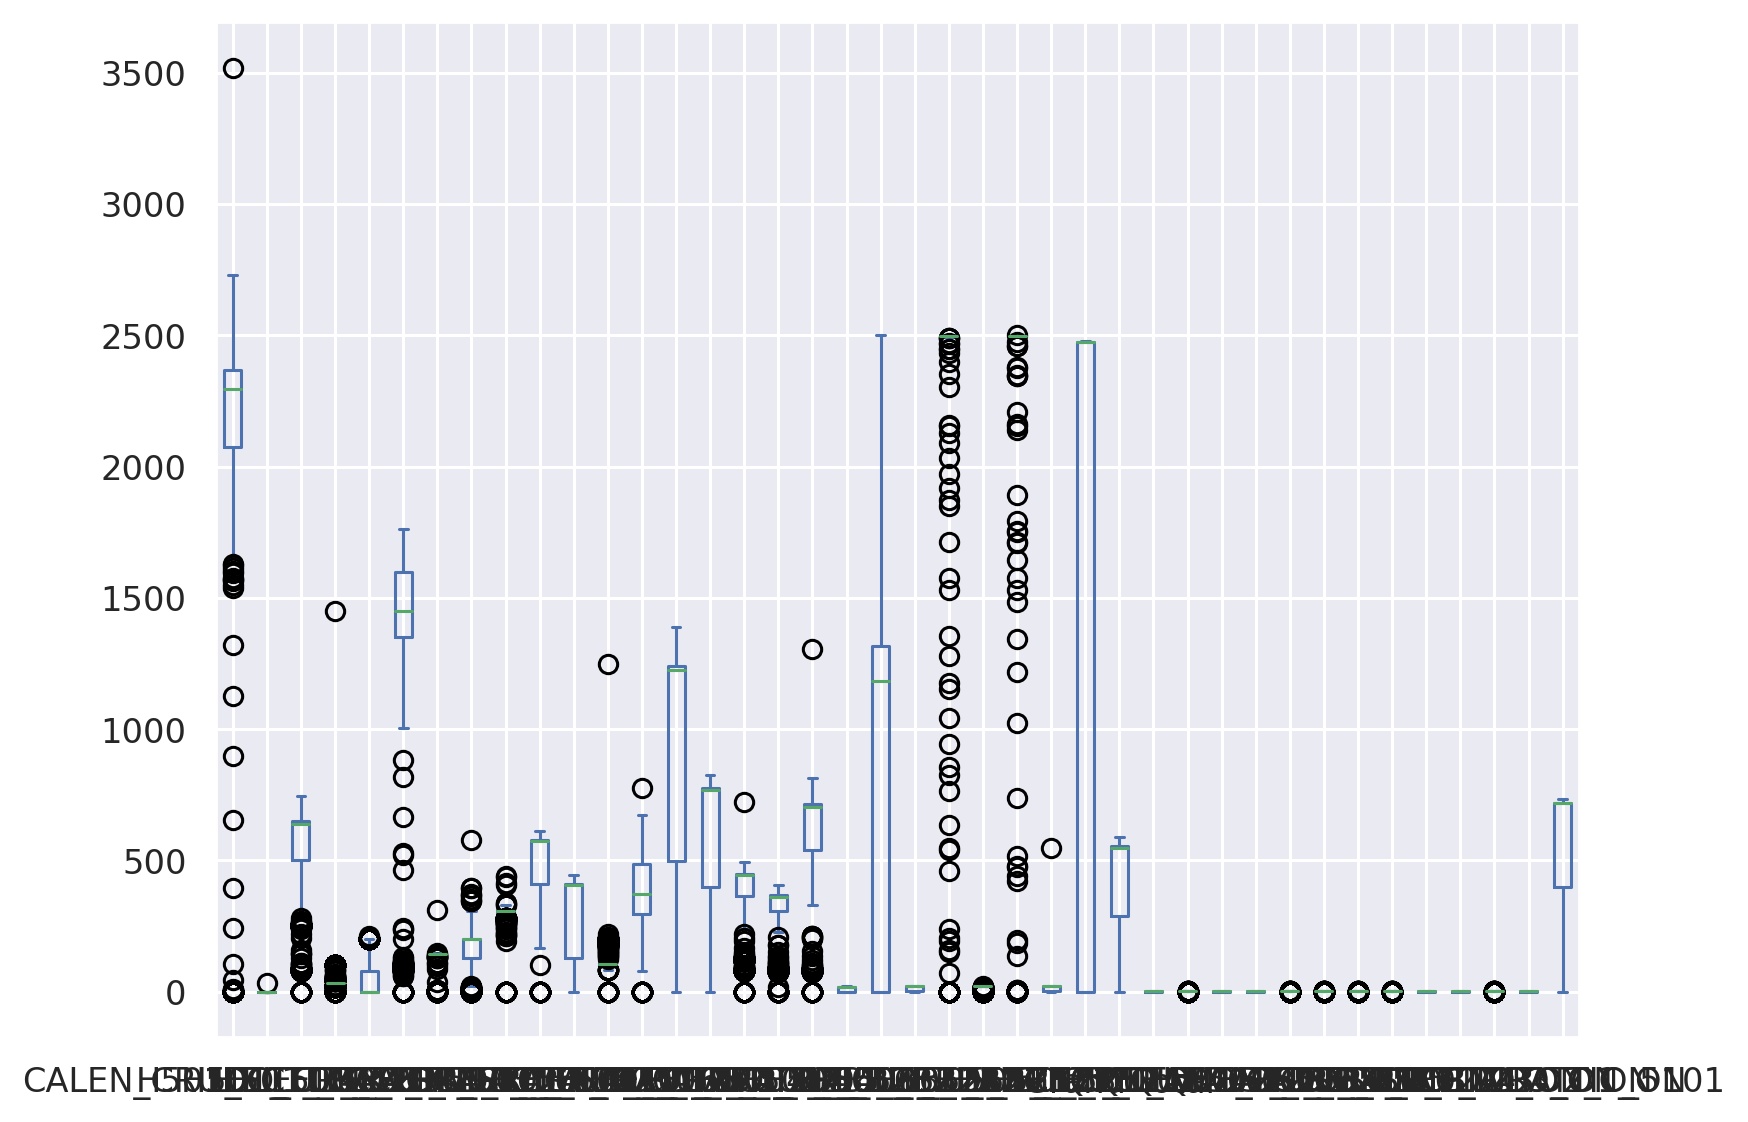

In [ ]:
df_H501[["CALEN_CRUDO_FIT_5015", "H501_PI_5001A", "H501_TI_5035", "H501_ZI_5208", "LECTURA_FIC_5003", "LECTURA_FRC_5002A", "LECTURA_PIAHL_5004", "LECTURA_PIC_5014", "LECTURA_TE_5001_3", "LECTURA_TI_5001_16", "LECTURA_TI_5001_17", "LECTURA_TI_5001_2", "LECTURA_TI_5004_1", "LECTURA_TI_5004_4", "LECTURA_TI_5004_5", "LECTURA_TI_5004_6", "LECTURA_TR_5003_1", "LECTURA_TR_5003_7A", "H501_BZI_5211DF", "H501_BZI_5211D", "H501_BZI_5211CF", "H501_BZI_5211C", "H501_BZI_5211BF", "H501_BZI_5211B", "H501_BZI_5211AF", "H501_BZI_5211A", "Grand Total", "H501_QUEMADOR1_ON", "H501_QUEMADOR2_ON", "H501_QUEMADOR3_ON", "H501_QUEMADOR4_ON", "H501_ZSO5101A", "H501_ZSO5101B", "H501_ZSO5102A", "H501_ZSO5102B", "H501_PILOTO4_ON", "H501_PILOTO3_ON", "H501_PILOTO2_ON", "H501_PILOTO1_ON", "LECTURA_TIC_5101"]].plot.box() 

In [ ]:

df_H501.describe(include='all')

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_ZSO5101A,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida2
count,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,...,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000,3792
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,En linea
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2372
mean,2117.388045,0.052503,571.364774,36.035763,33.807016,1388.881310,138.574155,170.561799,302.367442,513.152960,...,0.870206,0.870206,0.869765,0.869763,0.645307,0.723101,0.807474,0.649651,596.432098,NaN
std,497.414280,0.585140,142.340353,29.401328,62.947122,401.407581,29.244511,54.052964,32.707941,101.462992,...,0.334472,0.334470,0.334829,0.334828,0.477252,0.446082,0.392745,0.476047,201.230893,NaN
min,0.000000,-0.205143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2073.715000,-0.104766,502.596500,30.843900,0.000000,1350.087500,143.509750,128.923000,299.596250,409.455000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,400.075250,NaN
50%,2296.065000,-0.066853,638.310500,31.931600,0.000000,1450.280000,144.651000,199.597000,306.978000,572.800500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,719.938500,NaN
75%,2368.367500,0.289482,649.826250,34.916000,79.701475,1600.110000,145.788000,200.255250,312.071750,575.969750,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,720.441500,NaN


In [ ]:
df_H501.head(10)

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_ZSO5101A,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida2
0,2310.43,0.283046,666.733,37.1801,85.1166,1700.18,145.197,200.103,304.043,575.308,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.067,En linea
1,2299.54,0.274470,666.515,37.0941,85.0059,1699.97,145.019,201.296,304.187,575.845,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.901,En linea
2,2292.49,0.267280,666.297,37.0145,84.8952,1699.76,144.840,202.060,304.331,576.384,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.259,En linea
3,2291.76,0.272624,666.079,36.9922,84.7845,1699.54,144.661,201.014,304.442,576.882,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.323,En linea
4,2290.19,0.280965,665.861,36.9836,84.6738,1699.33,144.482,199.553,304.295,576.867,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.312,En linea
5,2296.84,0.289305,665.643,36.9749,84.5631,1699.04,144.304,199.277,304.095,576.613,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.092,En linea
6,2295.38,0.297646,665.425,36.9663,84.4524,1697.75,144.125,199.001,303.894,576.359,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.735,En linea
7,2302.45,0.305986,664.862,36.9577,84.3416,1696.16,144.170,199.397,303.694,575.822,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.430,En linea
8,2316.15,0.314327,663.100,36.9491,84.2309,1695.02,144.547,200.172,303.147,573.471,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,724.757,En linea
9,2305.25,0.322668,662.648,36.9404,84.1202,1702.54,144.358,202.256,303.010,573.990,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.390,En linea


In [ ]:
df_H501.tail(10)

In [ ]:
df_H501.sample(10)

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_ZSO5101A,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida2
236,2315.21,0.315000,645.172,31.1593,199.849,1604.05,144.100,199.3940,315.348,579.833,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,720.103,En linea
1558,2371.46,-0.147235,664.083,35.8106,0.000,1520.78,145.904,200.2960,319.440,577.136,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,720.082,En linea
798,2279.63,0.325000,639.029,30.8086,0.000,1699.70,145.643,199.4230,306.120,571.649,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,720.051,En linea
2825,2287.19,-0.025055,652.696,33.0342,0.000,1551.95,144.078,199.9500,316.711,580.134,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,719.886,En linea
1458,2419.00,-0.132488,639.732,33.4928,0.000,1524.48,144.349,201.7020,314.626,571.699,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,719.890,En linea
2840,2273.46,-0.083672,660.656,34.4692,0.000,1550.64,144.317,199.6760,315.194,578.666,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,720.204,En linea
1522,2423.30,-0.084212,640.679,34.9160,0.000,1517.95,144.382,199.6570,312.306,571.434,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,719.333,En linea
2418,2367.19,-0.081065,637.998,31.6652,0.000,1544.95,142.728,200.2990,311.933,573.392,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,720.235,En linea
3306,2267.40,-0.031875,648.876,32.7885,0.000,1419.51,143.356,202.3280,311.495,577.456,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,725.088,En linea
3674,1780.12,-0.073531,507.197,20.6016,0.000,1350.97,144.614,99.7866,294.334,383.884,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,400.514,En circulacion


<Axes: >

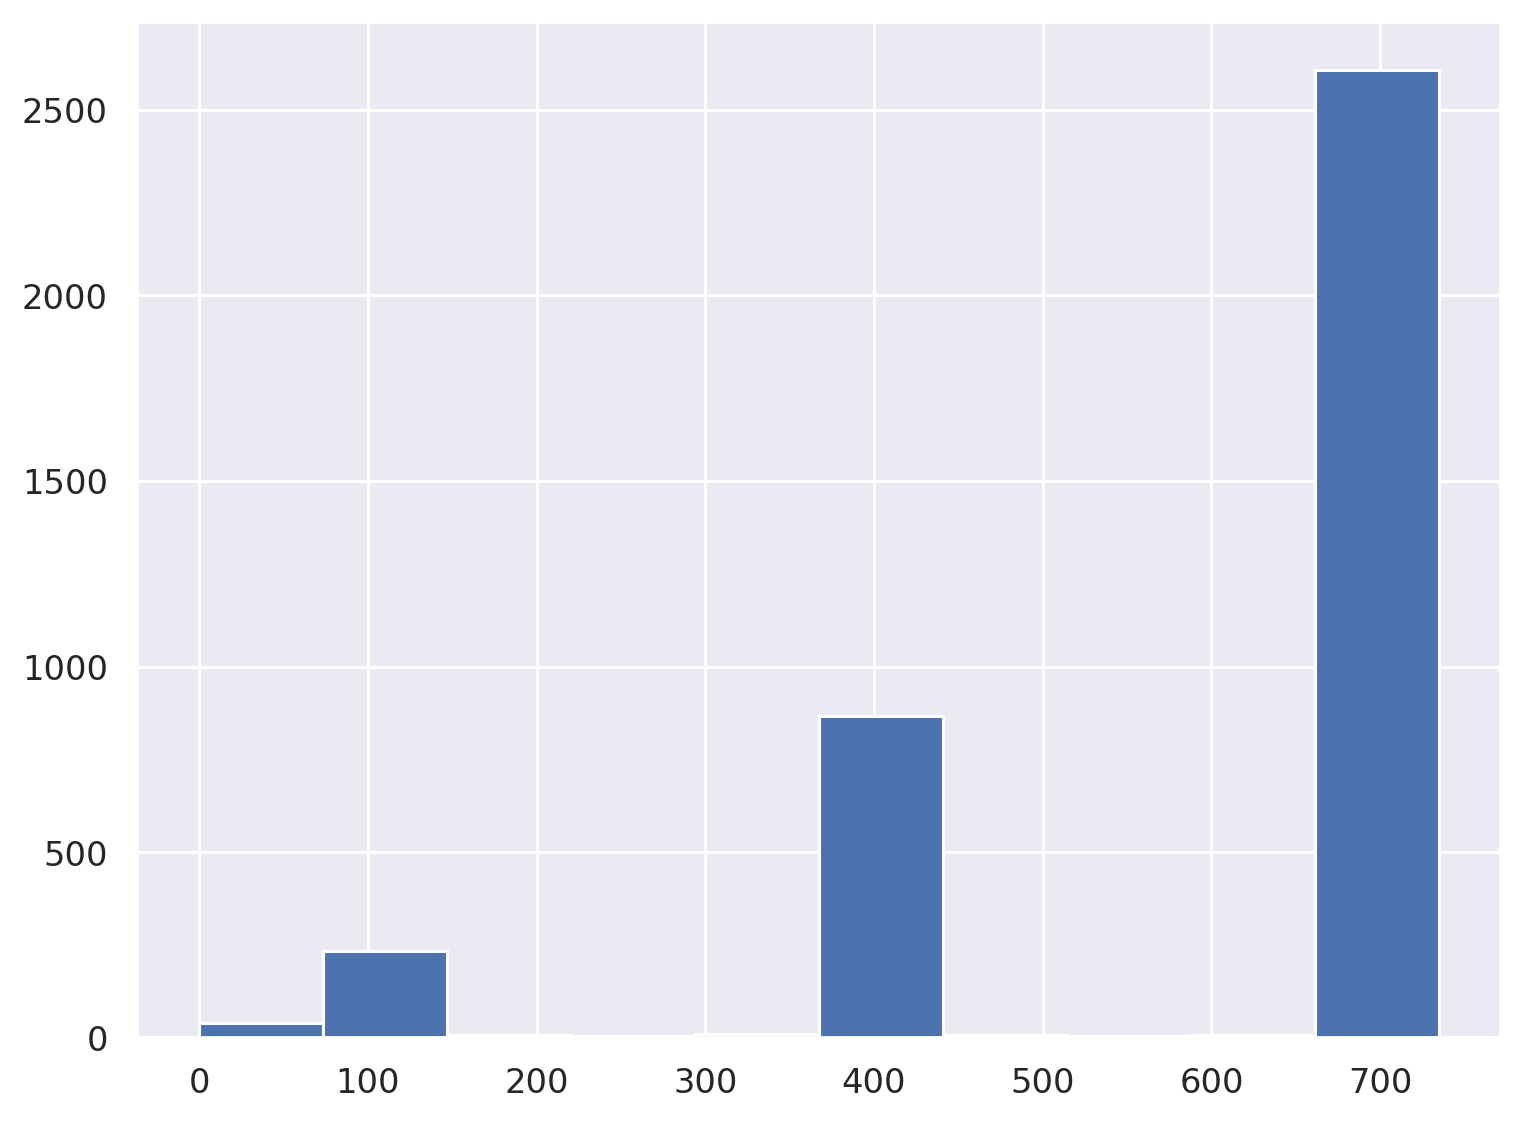

In [ ]:
df_H501['LECTURA_TIC_5101'].hist()

<Axes: >

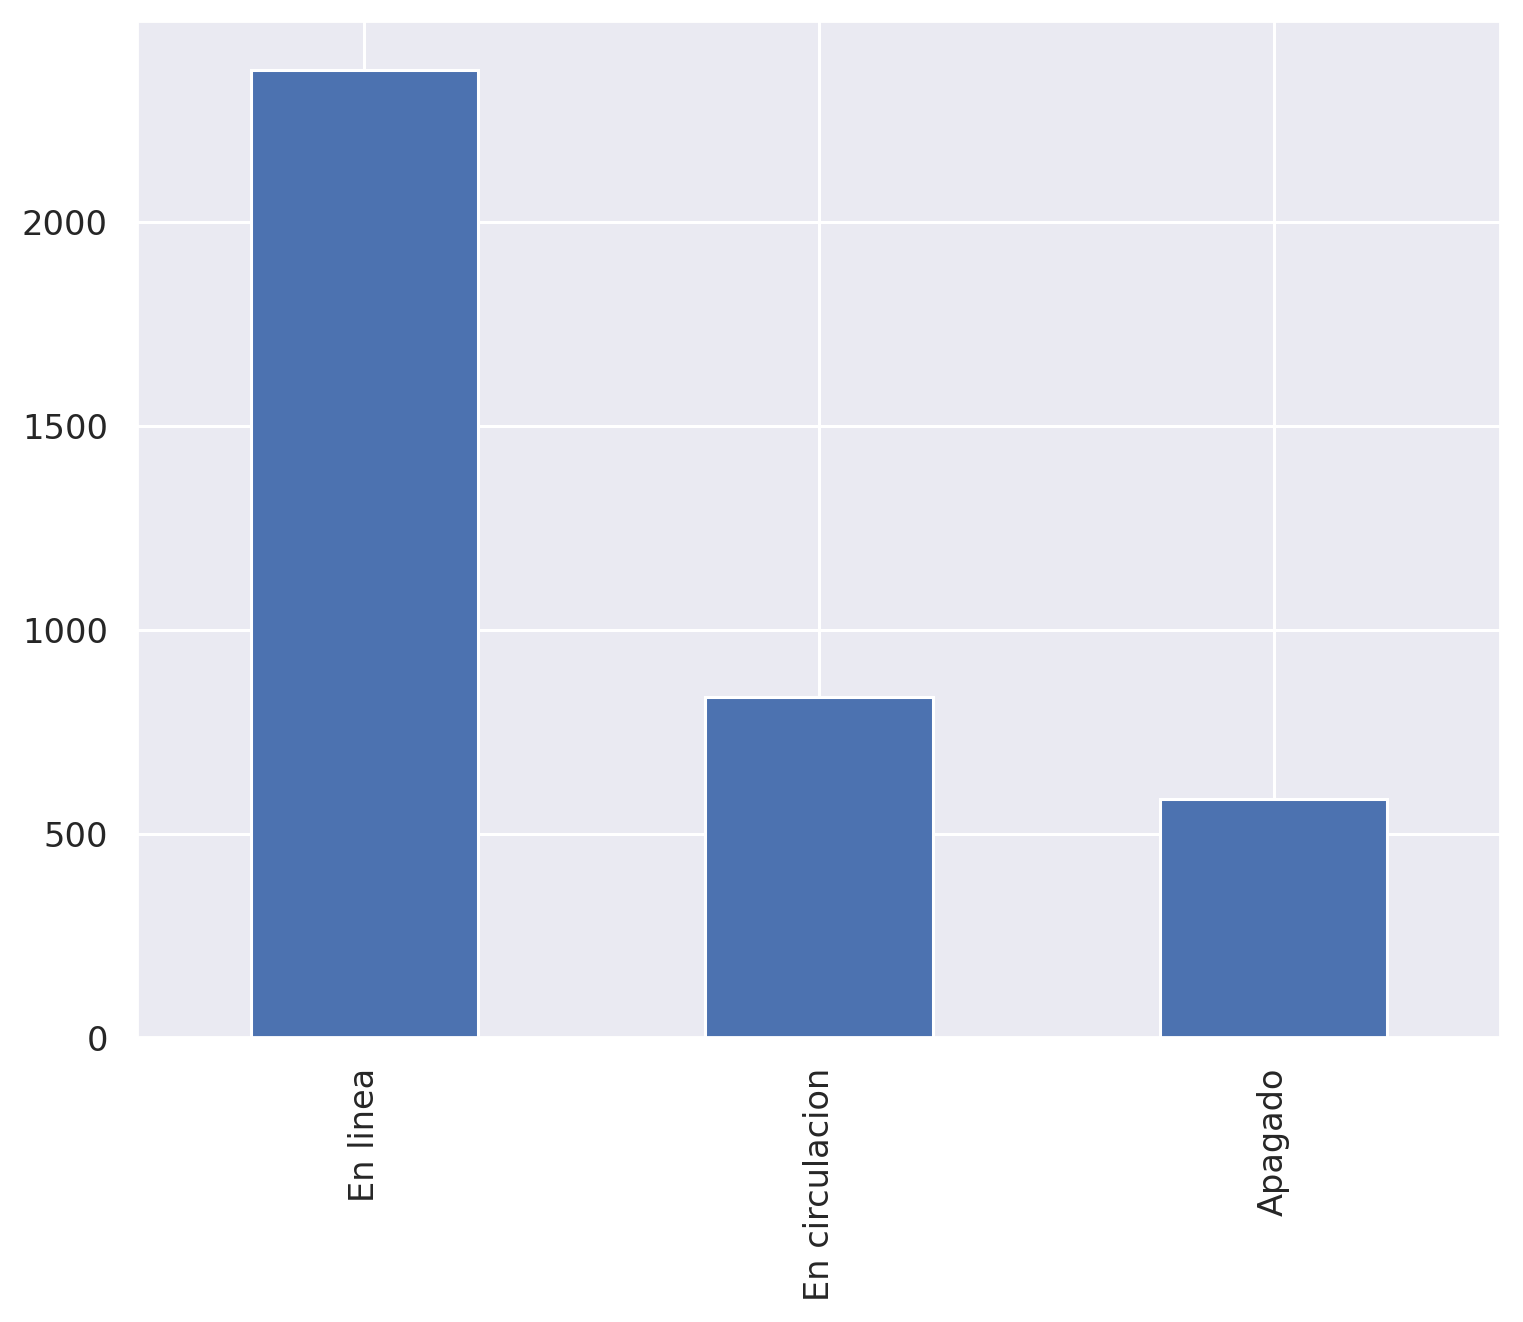

In [ ]:
df_H501['Salida2'].value_counts().plot(kind='bar')

In [ ]:
df_H501.kurtosis()

CALEN_CRUDO_FIT_5015      11.238628
H501_PI_5001A           2957.876289
H501_TI_5035               5.102582
H501_ZI_5208            1411.723045
LECTURA_FIC_5003           1.824901
LECTURA_FRC_5002A          5.802586
LECTURA_PIAHL_5004        17.949939
LECTURA_PIC_5014           3.077636
LECTURA_TE_5001_3         72.611205
LECTURA_TI_5001_16         4.898301
LECTURA_TI_5001_17        -1.144284
LECTURA_TI_5001_2        125.118732
LECTURA_TI_5004_1         -0.317785
LECTURA_TI_5004_4         -0.687952
LECTURA_TI_5004_5          0.279231
LECTURA_TI_5004_6          5.682098
LECTURA_TR_5003_1          5.991341
LECTURA_TR_5003_7A         5.343876
H501_BZI_5211DF           -1.486784
H501_BZI_5211D            -1.453887
H501_BZI_5211CF           -0.825299
H501_BZI_5211C            -0.473884
H501_BZI_5211BF            0.510998
H501_BZI_5211B             1.751235
H501_BZI_5211AF          959.534256
H501_BZI_5211A            -1.328576
Grand Total                0.257401
H501_QUEMADOR1_ON         -1

array([[<Axes: title={'center': 'CALEN_CRUDO_FIT_5015'}>,
        <Axes: title={'center': 'H501_PI_5001A'}>,
        <Axes: title={'center': 'H501_TI_5035'}>,
        <Axes: title={'center': 'H501_ZI_5208'}>,
        <Axes: title={'center': 'LECTURA_FIC_5003'}>,
        <Axes: title={'center': 'LECTURA_FRC_5002A'}>],
       [<Axes: title={'center': 'LECTURA_PIAHL_5004'}>,
        <Axes: title={'center': 'LECTURA_PIC_5014'}>,
        <Axes: title={'center': 'LECTURA_TE_5001_3'}>,
        <Axes: title={'center': 'LECTURA_TI_5001_16'}>,
        <Axes: title={'center': 'LECTURA_TI_5001_17'}>,
        <Axes: title={'center': 'LECTURA_TI_5001_2'}>],
       [<Axes: title={'center': 'LECTURA_TI_5004_1'}>,
        <Axes: title={'center': 'LECTURA_TI_5004_4'}>,
        <Axes: title={'center': 'LECTURA_TI_5004_5'}>,
        <Axes: title={'center': 'LECTURA_TI_5004_6'}>,
        <Axes: title={'center': 'LECTURA_TR_5003_1'}>,
        <Axes: title={'center': 'LECTURA_TR_5003_7A'}>],
       [<Axes: t

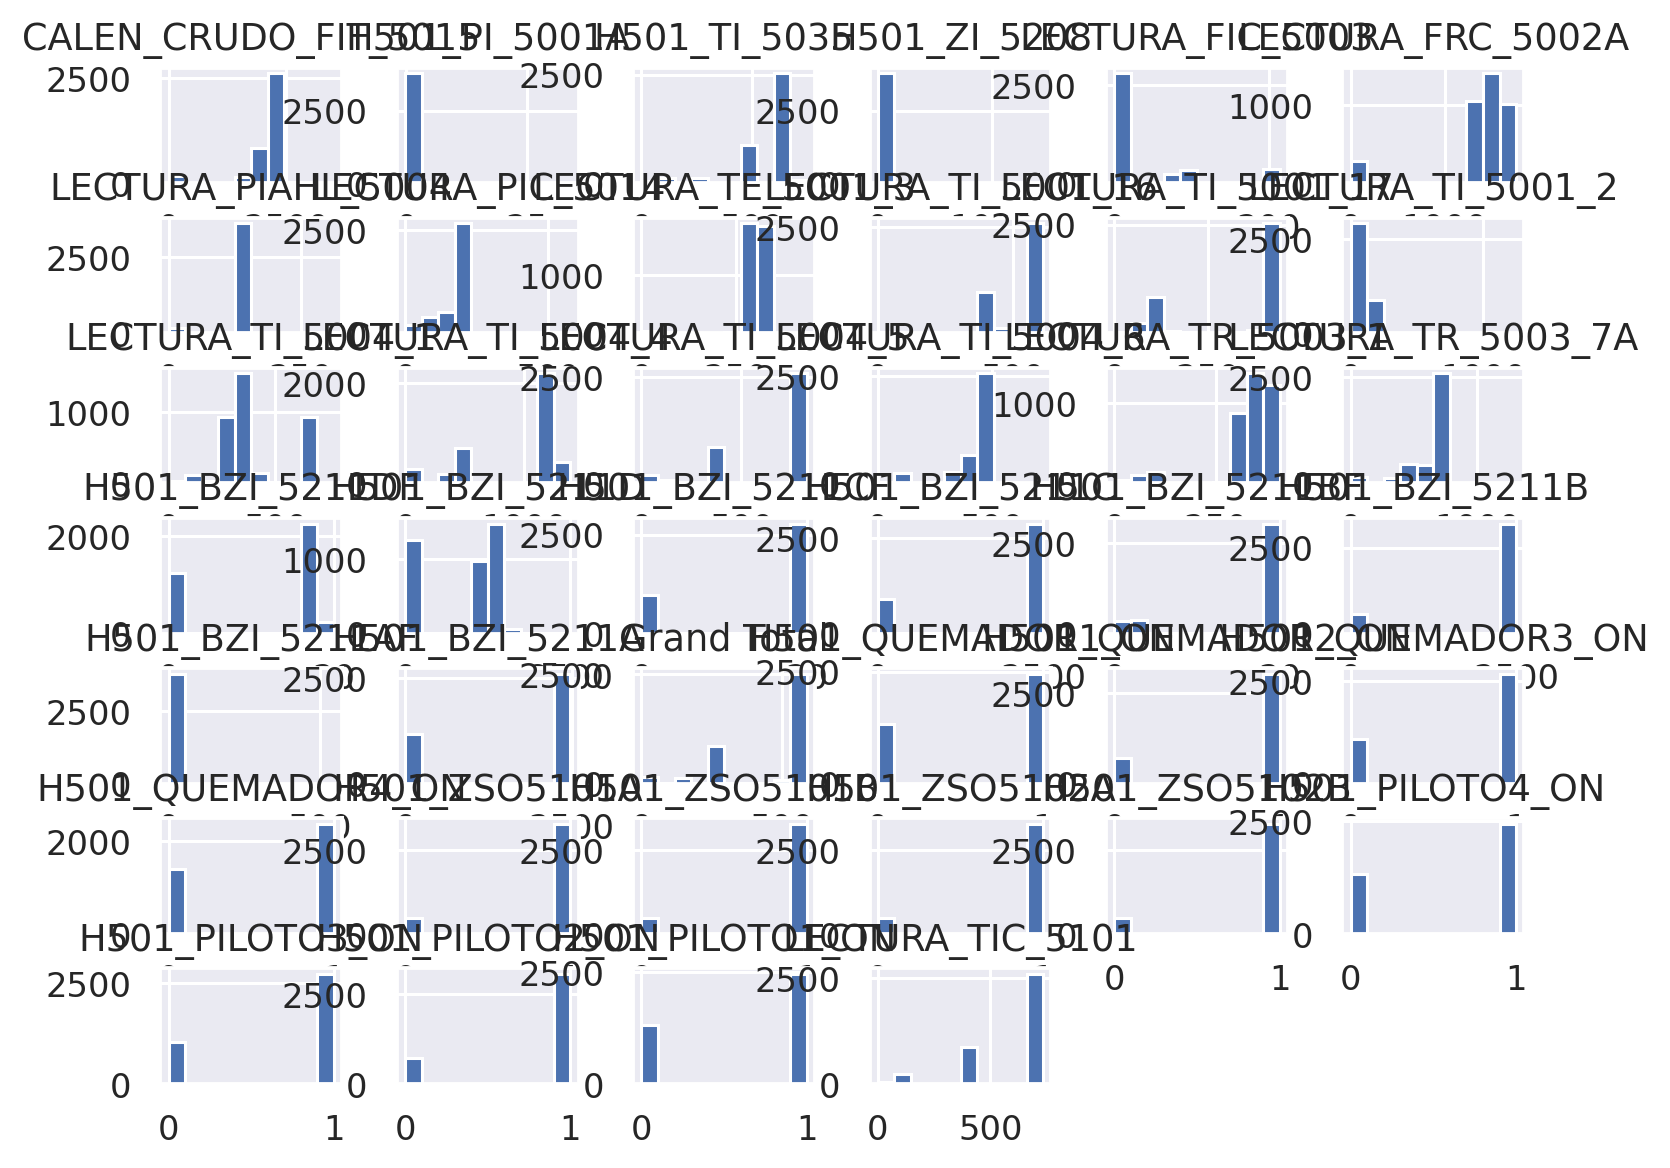

In [ ]:
df_H501.hist()

<Axes: >

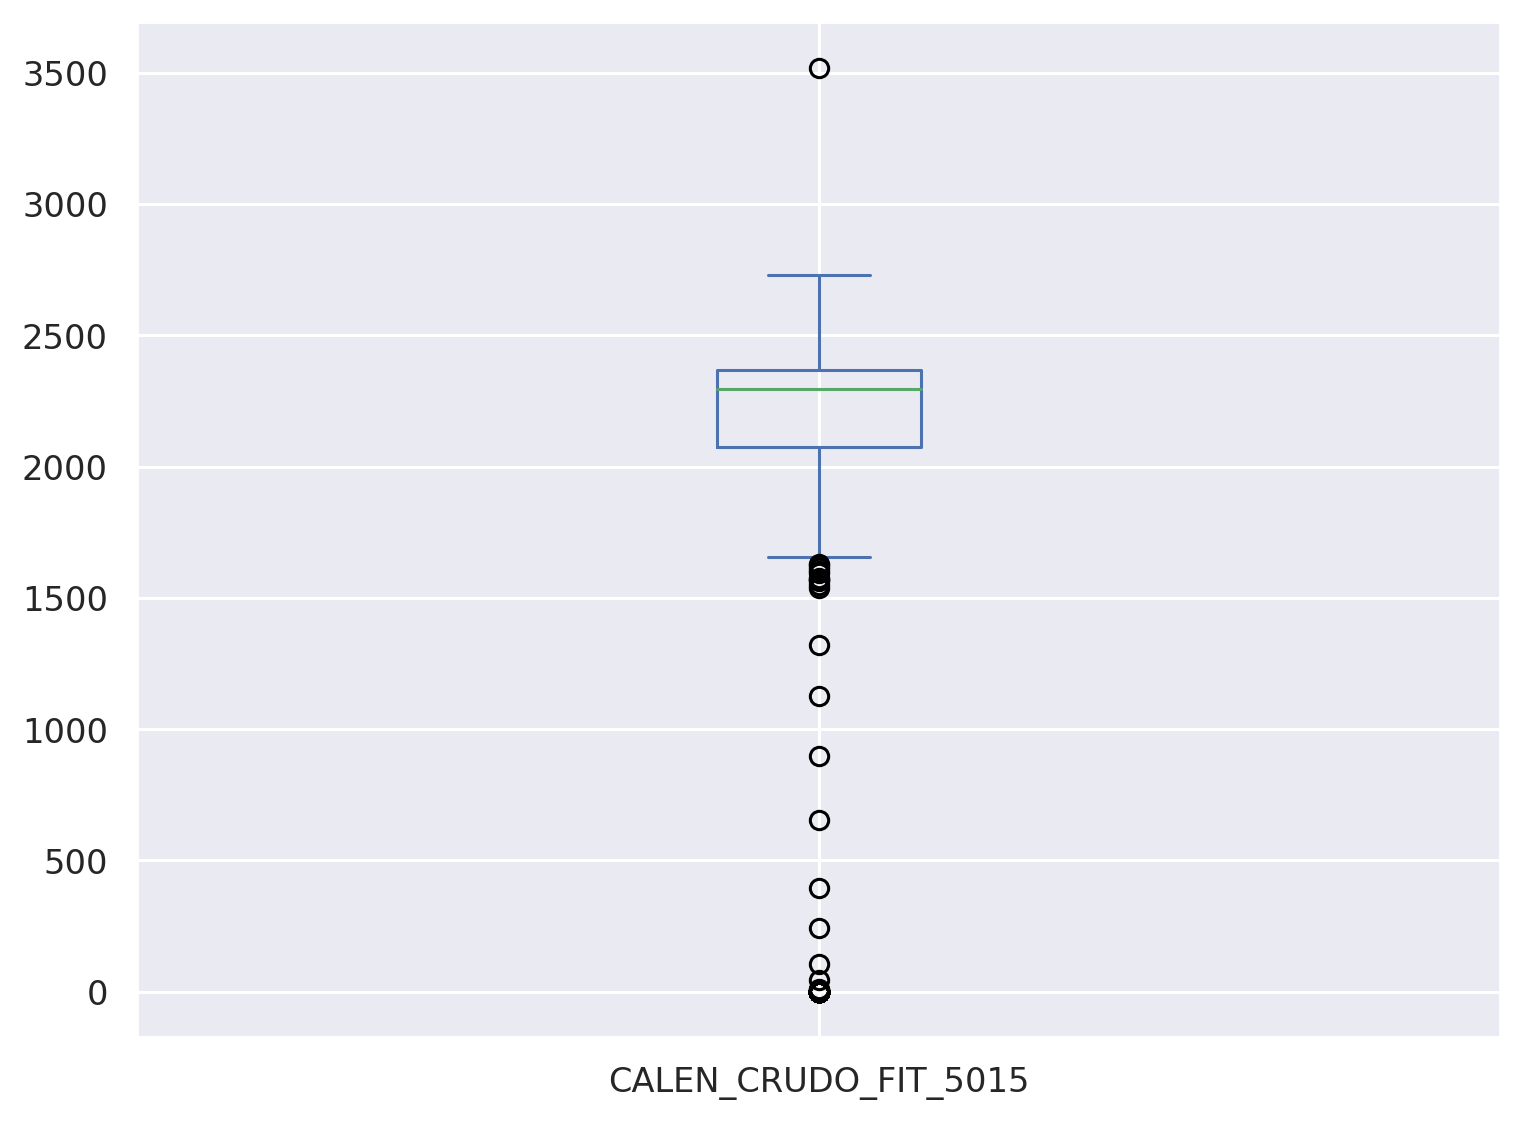

In [ ]:
df_H501['CALEN_CRUDO_FIT_5015'].plot.box()


#**3. Preparación de los datos**



*a. Selección de datos finales*
------


*b.Normalizacion de las variables númericas*
------


In [ ]:
#Normalizacion de las variables númericas

from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()


In [ ]:
min_max_scaler.fit(df_H501[["CALEN_CRUDO_FIT_5015", "H501_PI_5001A", "H501_TI_5035", "H501_ZI_5208", "LECTURA_FIC_5003", "LECTURA_FRC_5002A", "LECTURA_PIAHL_5004", "LECTURA_PIC_5014", "LECTURA_TE_5001_3", "LECTURA_TI_5001_16", "LECTURA_TI_5001_17", "LECTURA_TI_5001_2", "LECTURA_TI_5004_1", "LECTURA_TI_5004_4", "LECTURA_TI_5004_5", "LECTURA_TI_5004_6", "LECTURA_TR_5003_1", "LECTURA_TR_5003_7A", "H501_BZI_5211DF", "H501_BZI_5211D", "H501_BZI_5211CF", "H501_BZI_5211C", "H501_BZI_5211BF", "H501_BZI_5211B", "H501_BZI_5211AF", "H501_BZI_5211A", "Grand Total", "H501_QUEMADOR1_ON", "H501_QUEMADOR2_ON", "H501_QUEMADOR3_ON", "H501_QUEMADOR4_ON", "H501_ZSO5101A", "H501_ZSO5101B", "H501_ZSO5102A", "H501_ZSO5102B", "H501_PILOTO4_ON", "H501_PILOTO3_ON", "H501_PILOTO2_ON", "H501_PILOTO1_ON", "LECTURA_TIC_5101"]])
min_max_scaler

MinMaxScaler()

In [ ]:
df_H501[["CALEN_CRUDO_FIT_5015", "H501_PI_5001A", "H501_TI_5035", "H501_ZI_5208", "LECTURA_FIC_5003", "LECTURA_FRC_5002A", "LECTURA_PIAHL_5004", "LECTURA_PIC_5014", "LECTURA_TE_5001_3", "LECTURA_TI_5001_16", "LECTURA_TI_5001_17", "LECTURA_TI_5001_2", "LECTURA_TI_5004_1", "LECTURA_TI_5004_4", "LECTURA_TI_5004_5", "LECTURA_TI_5004_6", "LECTURA_TR_5003_1", "LECTURA_TR_5003_7A", "H501_BZI_5211DF", "H501_BZI_5211D", "H501_BZI_5211CF", "H501_BZI_5211C", "H501_BZI_5211BF", "H501_BZI_5211B", "H501_BZI_5211AF", "H501_BZI_5211A", "Grand Total", "H501_QUEMADOR1_ON", "H501_QUEMADOR2_ON", "H501_QUEMADOR3_ON", "H501_QUEMADOR4_ON", "H501_ZSO5101A", "H501_ZSO5101B", "H501_ZSO5102A", "H501_ZSO5102B", "H501_PILOTO4_ON", "H501_PILOTO3_ON", "H501_PILOTO2_ON", "H501_PILOTO1_ON", "LECTURA_TIC_5101"]]=min_max_scaler.transform(df_H501[["CALEN_CRUDO_FIT_5015", "H501_PI_5001A", "H501_TI_5035", "H501_ZI_5208", "LECTURA_FIC_5003", "LECTURA_FRC_5002A", "LECTURA_PIAHL_5004", "LECTURA_PIC_5014", "LECTURA_TE_5001_3", "LECTURA_TI_5001_16", "LECTURA_TI_5001_17", "LECTURA_TI_5001_2", "LECTURA_TI_5004_1", "LECTURA_TI_5004_4", "LECTURA_TI_5004_5", "LECTURA_TI_5004_6", "LECTURA_TR_5003_1", "LECTURA_TR_5003_7A", "H501_BZI_5211DF", "H501_BZI_5211D", "H501_BZI_5211CF", "H501_BZI_5211C", "H501_BZI_5211BF", "H501_BZI_5211B", "H501_BZI_5211AF", "H501_BZI_5211A", "Grand Total", "H501_QUEMADOR1_ON", "H501_QUEMADOR2_ON", "H501_QUEMADOR3_ON", "H501_QUEMADOR4_ON", "H501_ZSO5101A", "H501_ZSO5101B", "H501_ZSO5102A", "H501_ZSO5102B", "H501_PILOTO4_ON", "H501_PILOTO3_ON", "H501_PILOTO2_ON", "H501_PILOTO1_ON", "LECTURA_TIC_5101"]])
df_H501.head()

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_ZSO5101A,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida2
0,0.656678,0.014311,0.892954,0.025642,0.398775,0.964515,0.464795,0.346352,0.692658,0.939685,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986654,En linea
1,0.653583,0.014059,0.892662,0.025582,0.398257,0.964396,0.464226,0.348417,0.692986,0.940562,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986428,En linea
2,0.651579,0.013849,0.892370,0.025528,0.397738,0.964277,0.463653,0.349740,0.693314,0.941442,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986915,En linea
3,0.651372,0.014005,0.892078,0.025512,0.397219,0.964152,0.463080,0.347929,0.693567,0.942256,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987002,En linea
4,0.650925,0.014250,0.891786,0.025506,0.396701,0.964033,0.462507,0.345400,0.693232,0.942231,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986987,En linea


<Axes: >

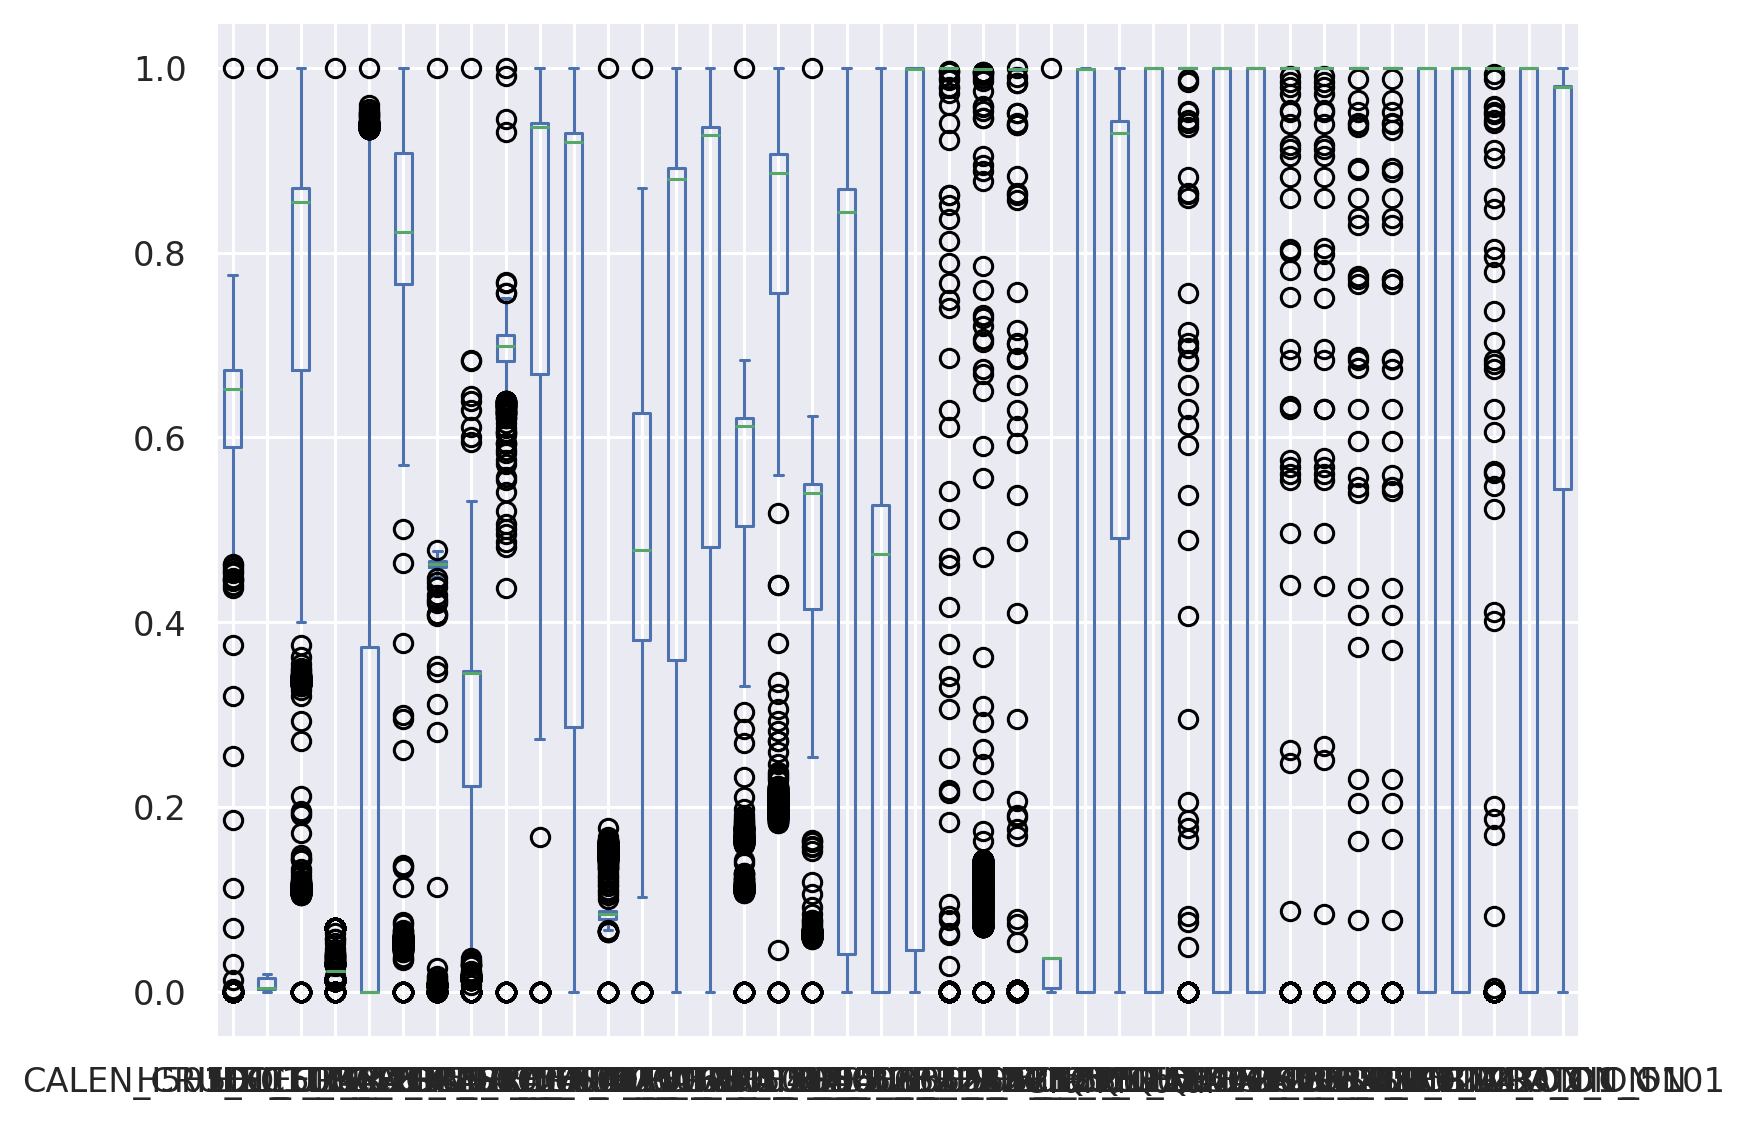

In [ ]:
df_H501[["CALEN_CRUDO_FIT_5015", "H501_PI_5001A", "H501_TI_5035", "H501_ZI_5208", "LECTURA_FIC_5003", "LECTURA_FRC_5002A", "LECTURA_PIAHL_5004", "LECTURA_PIC_5014", "LECTURA_TE_5001_3", "LECTURA_TI_5001_16", "LECTURA_TI_5001_17", "LECTURA_TI_5001_2", "LECTURA_TI_5004_1", "LECTURA_TI_5004_4", "LECTURA_TI_5004_5", "LECTURA_TI_5004_6", "LECTURA_TR_5003_1", "LECTURA_TR_5003_7A", "H501_BZI_5211DF", "H501_BZI_5211D", "H501_BZI_5211CF", "H501_BZI_5211C", "H501_BZI_5211BF", "H501_BZI_5211B", "H501_BZI_5211AF", "H501_BZI_5211A", "Grand Total", "H501_QUEMADOR1_ON", "H501_QUEMADOR2_ON", "H501_QUEMADOR3_ON", "H501_QUEMADOR4_ON", "H501_ZSO5101A", "H501_ZSO5101B", "H501_ZSO5102A", "H501_ZSO5102B", "H501_PILOTO4_ON", "H501_PILOTO3_ON", "H501_PILOTO2_ON", "H501_PILOTO1_ON", "LECTURA_TIC_5101"]].plot.box() 

# **SMOTE CLASES DESBALANCEADAS**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt




In [ ]:
X

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_QUEMADOR4_ON,H501_ZSO5101A,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101
0,0.656678,0.014311,0.892954,0.025642,0.398775,0.964515,0.464795,0.346352,0.692658,0.939685,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986654
1,0.653583,0.014059,0.892662,0.025582,0.398257,0.964396,0.464226,0.348417,0.692986,0.940562,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986428
2,0.651579,0.013849,0.892370,0.025528,0.397738,0.964277,0.463653,0.349740,0.693314,0.941442,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986915
3,0.651372,0.014005,0.892078,0.025512,0.397219,0.964152,0.463080,0.347929,0.693567,0.942256,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987002
4,0.650925,0.014250,0.891786,0.025506,0.396701,0.964033,0.462507,0.345400,0.693232,0.942231,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0.668661,0.005292,0.875394,0.023384,0.000000,0.822849,0.461556,0.346830,0.710282,0.942035,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986515
3788,0.666899,0.005292,0.875986,0.023385,0.000000,0.822781,0.462244,0.346056,0.710576,0.942543,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986587
3789,0.656681,0.005292,0.876577,0.023385,0.000000,0.822712,0.462929,0.345724,0.710870,0.943040,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.985912
3790,0.649558,0.005292,0.877145,0.023385,0.000000,0.822644,0.461694,0.345395,0.711205,0.943958,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987153


In [ ]:
y

0       2
1       2
2       2
3       2
4       2
       ..
3787    2
3788    2
3789    2
3790    2
3791    2
Name: Salida_num, Length: 3792, dtype: int64

# **Verificar la ncantidad de registros de las clases minoriatarias**




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE





In [ ]:
# Convertir la columna Salida a formato numérico
le = LabelEncoder()
df_H501["Salida_num"] = le.fit_transform(df_H501["Salida2"])


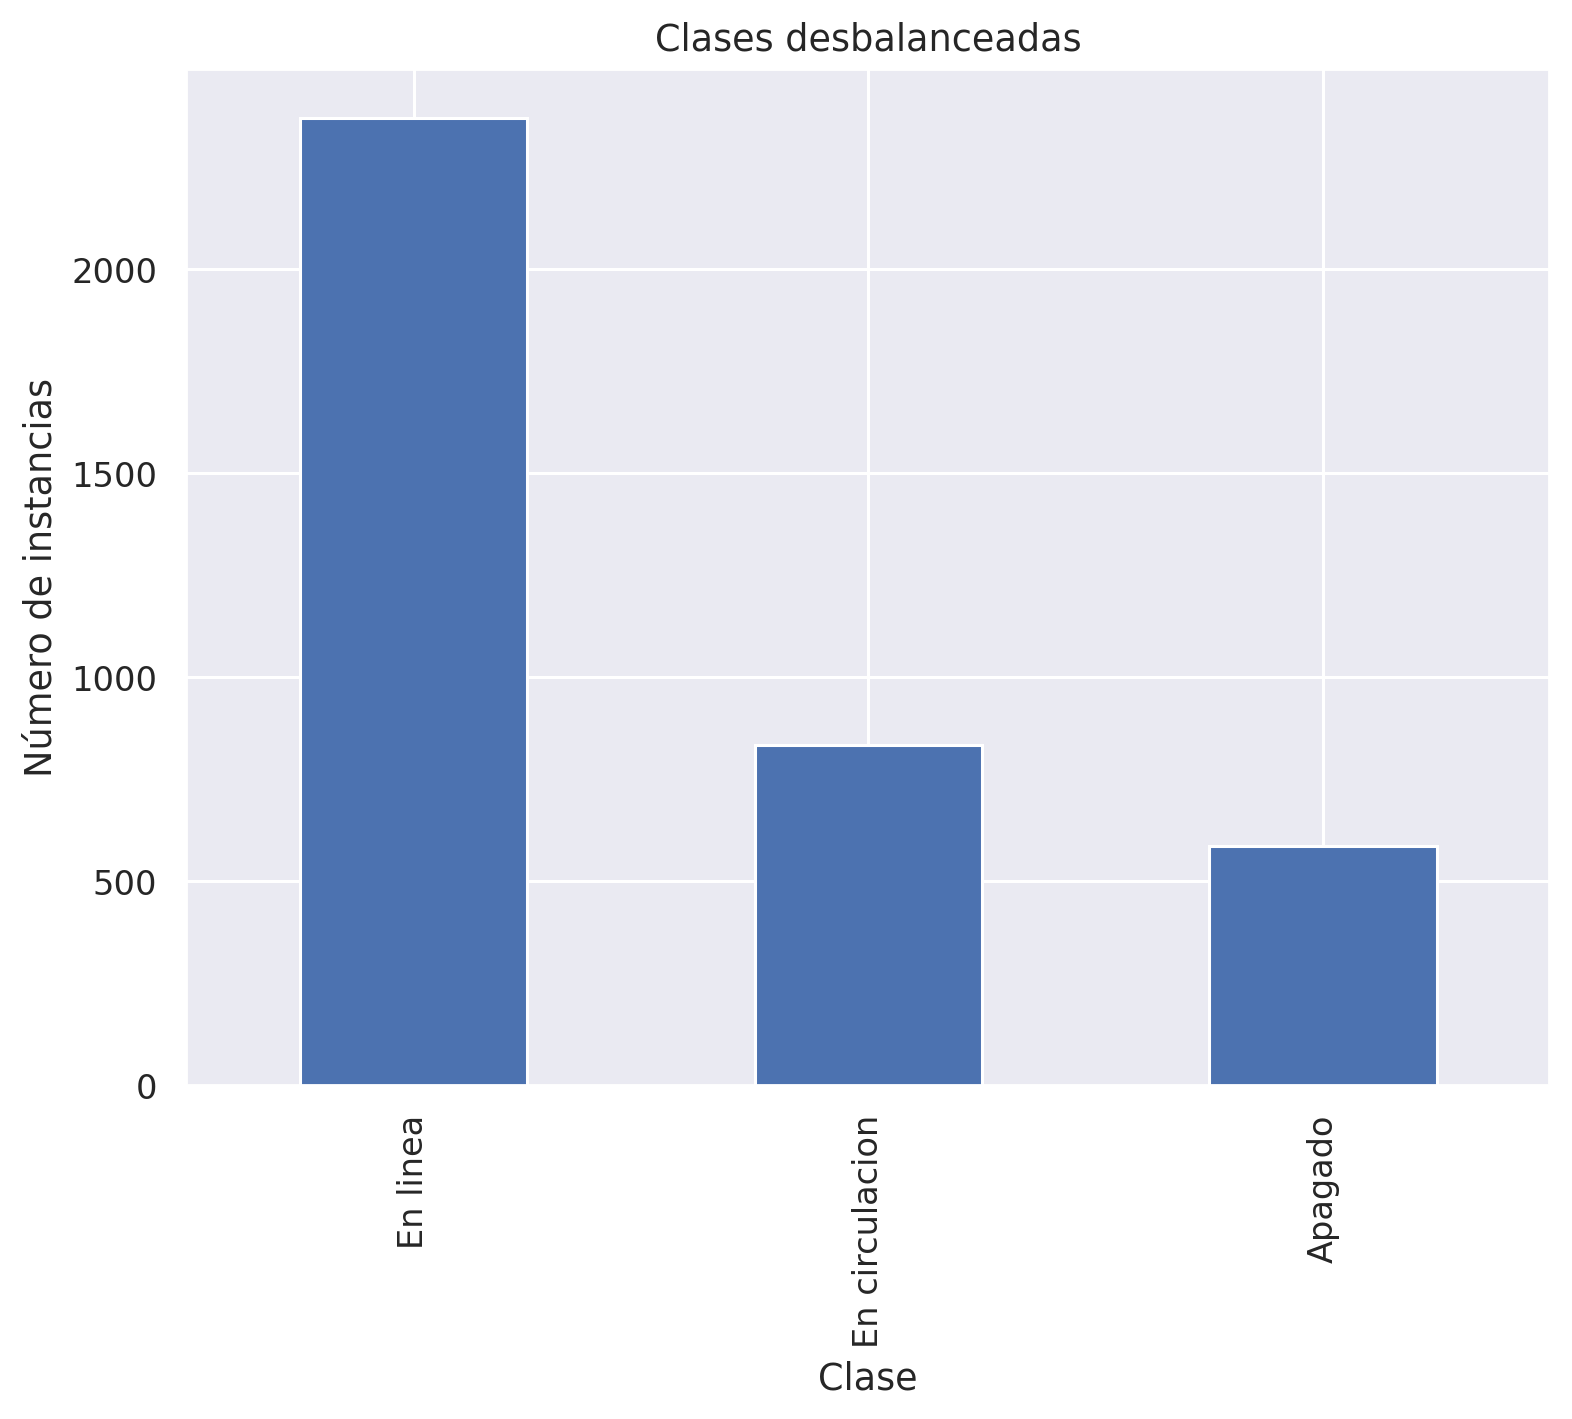

In [ ]:

# Graficar las clases desbalanceadas
fig, ax = plt.subplots()
df_H501["Salida2"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Clases desbalanceadas")
ax.set_xlabel("Clase")
ax.set_ylabel("Número de instancias")
plt.show()


In [ ]:

# Balancear las clases hasta el 50% de la clase mayoritaria
minorias_class_max = int(df_H501["Salida2"].value_counts().max() * 0.5)
cuenta_clases_min = df_H501["Salida2"].value_counts().min()
if cuenta_clases_min > minorias_class_max:
    # Realizar muestreo aleatorio para reducir la cantidad de registros
    minclas_Index = np.where(df_H501['Salida2'] == df_H501["Salida2"].value_counts().idxmin())[0]
    randoom_minoria_clases = np.random.choice(minclas_Index, size=int(minorias_class_max), replace=False)
    df_H501_balanced2 = pd.concat([df_H501[df_H501['Salida2']!=df_H501["Salida2"].value_counts().idxmin()], 
                                   df_H501.iloc[randoom_minoria_clases]], axis=0) 
else:
    df_H501_balanced2 = df_H501.copy()



In [ ]:
df_H501_balanced2

,CALEN_CRUDO_FIT_5015,H501_PI_5001A,H501_TI_5035,H501_ZI_5208,LECTURA_FIC_5003,LECTURA_FRC_5002A,LECTURA_PIAHL_5004,LECTURA_PIC_5014,LECTURA_TE_5001_3,LECTURA_TI_5001_16,...,H501_ZSO5101B,H501_ZSO5102A,H501_ZSO5102B,H501_PILOTO4_ON,H501_PILOTO3_ON,H501_PILOTO2_ON,H501_PILOTO1_ON,LECTURA_TIC_5101,Salida2,Salida_num
0,0.656678,0.014311,0.892954,0.025642,0.398775,0.964515,0.464795,0.346352,0.692658,0.939685,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986654,En linea,2
1,0.653583,0.014059,0.892662,0.025582,0.398257,0.964396,0.464226,0.348417,0.692986,0.940562,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986428,En linea,2
2,0.651579,0.013849,0.892370,0.025528,0.397738,0.964277,0.463653,0.349740,0.693314,0.941442,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986915,En linea,2
3,0.651372,0.014005,0.892078,0.025512,0.397219,0.964152,0.463080,0.347929,0.693567,0.942256,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987002,En linea,2
4,0.650925,0.014250,0.891786,0.025506,0.396701,0.964033,0.462507,0.345400,0.693232,0.942231,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986987,En linea,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0.668661,0.005292,0.875394,0.023384,0.000000,0.822849,0.461556,0.346830,0.710282,0.942035,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986515,En linea,2
3788,0.666899,0.005292,0.875986,0.023385,0.000000,0.822781,0.462244,0.346056,0.710576,0.942543,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.986587,En linea,2
3789,0.656681,0.005292,0.876577,0.023385,0.000000,0.822712,0.462929,0.345724,0.710870,0.943040,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.985912,En linea,2
3790,0.649558,0.005292,0.877145,0.023385,0.000000,0.822644,0.461694,0.345395,0.711205,0.943958,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.987153,En linea,2


In [ ]:
# Aplicar SMOTE para balancear las clases
# Set the target number of samples for minority classes
target_samples = 1255 #int(0.5 * len(df_H501_balanced2[df_H501_balanced2['Salida2'] == 'en Linea']))

# Define the SMOTE object with the desired parameters
smote = SMOTE(sampling_strategy={0: target_samples, 1: target_samples}, random_state=42, k_neighbors=5)

#X = df_H501_balanced2.drop(["Salida2", "Salida_num"], axis=1)
#y = df_H501_balanced2["Salida_num"]
X_resampled, y_resampled = smote.fit_resample(X, y)

df_H501_balanced2 = pd.concat([X_resampled, y_resampled], axis=1)
df_H501_balanced2["Salida"] = le.inverse_transform(df_H501_balanced2["Salida_num"])

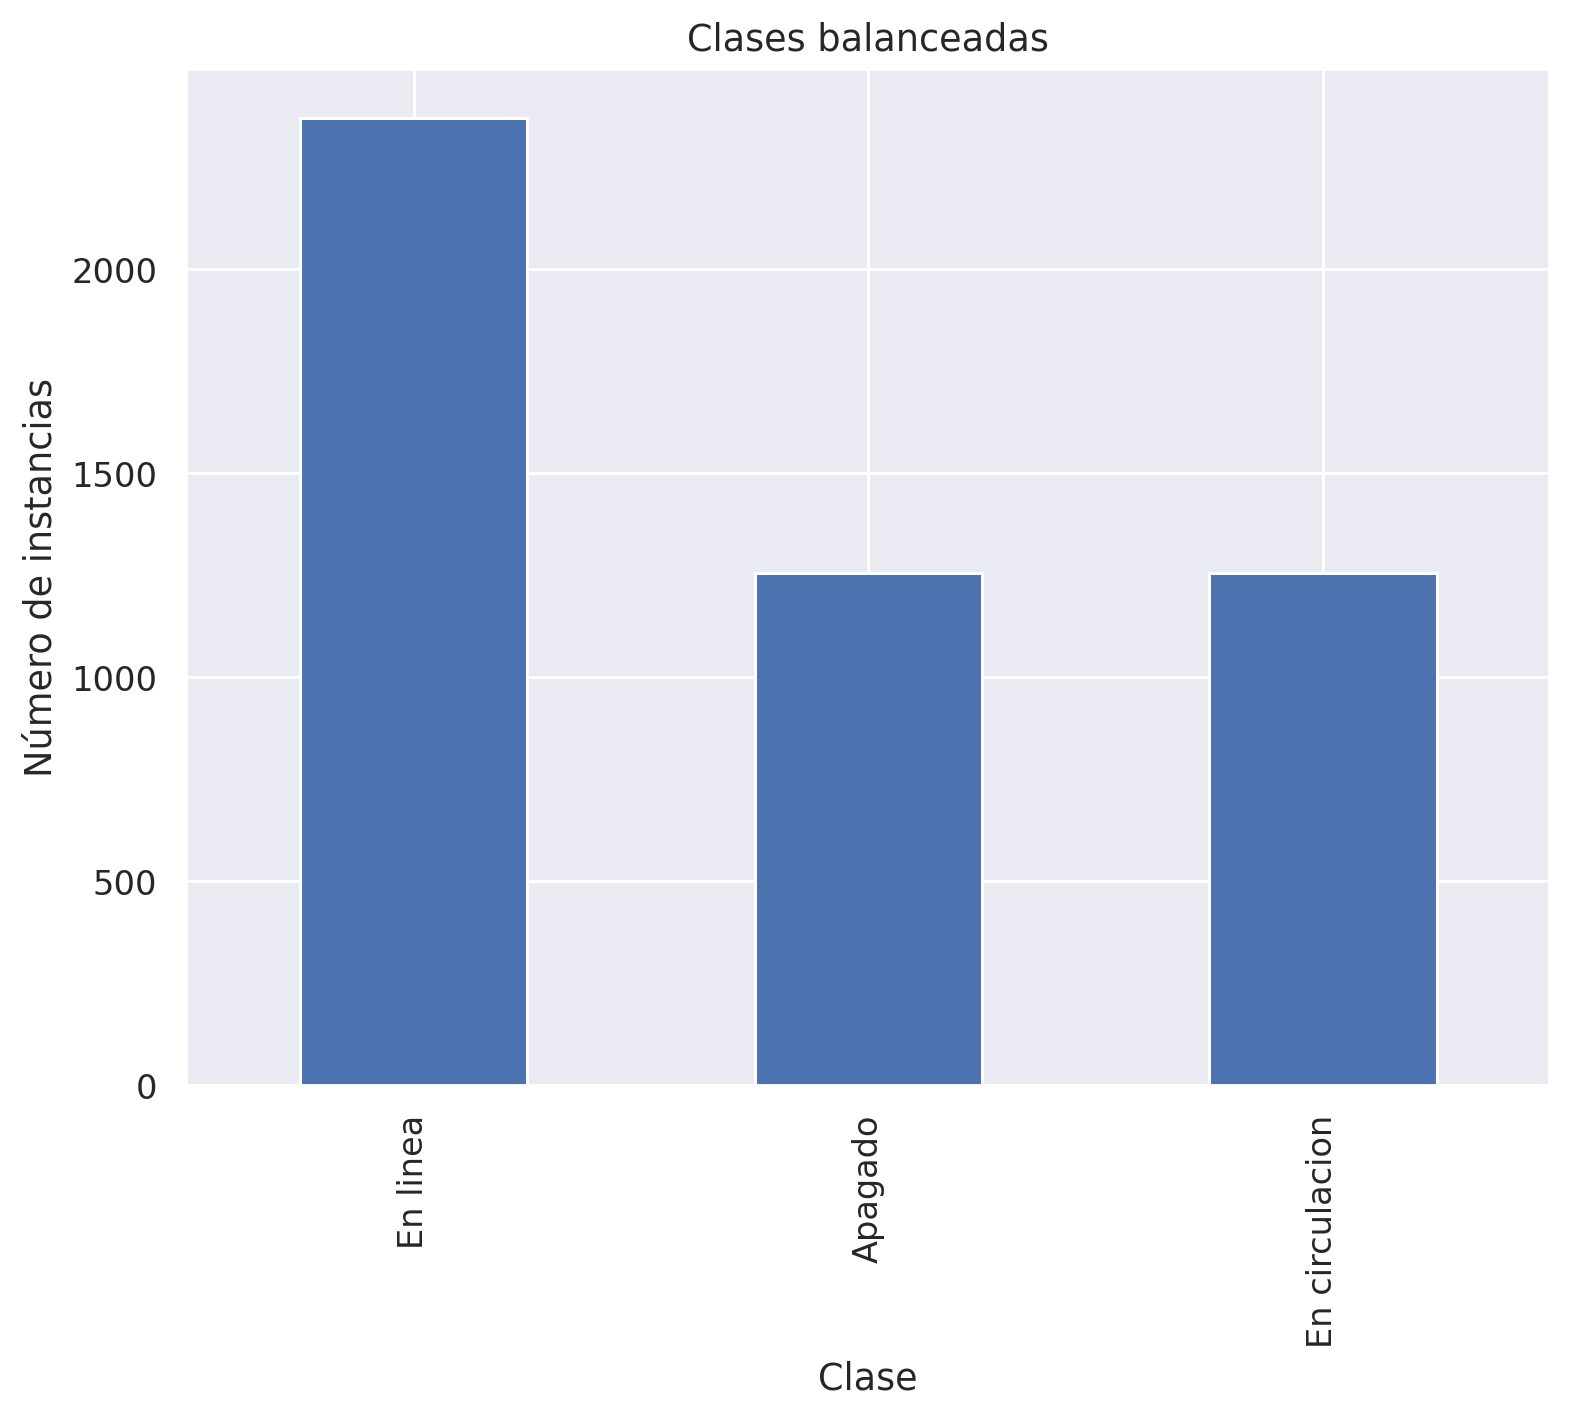

In [ ]:
# Graficar las clases balanceadas
fig, ax = plt.subplots()
df_H501_balanced2["Salida"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Clases balanceadas")
ax.set_xlabel("Clase")
ax.set_ylabel("Número de instancias")
plt.show()

*c. División 70 - 30 de los datos*
------


#**4. Modelamiento**


In [ ]:
df_H501_balanced

In [ ]:
df_H501_balanced = df_H501_balanced.drop(columns=["Salida_num"])


In [ ]:
df_H501_balanced

In [ ]:
def split(df, train_size=.7, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_size * m)
    validate_end = int(validate_percent * m) + train_end
    
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]


    X_train = train.drop("Salida", axis = 1) #70%
    Y_train=  train.loc[:, ["Salida"]]
    
    X_val = validate.drop("Salida", axis = 1) #20%
    Y_val=  validate.loc[:, ["Salida"]]
    #X_train=train.loc[:, ["feature 1",	"Feature 2",	"Feature 3",	"feature4"]]
    #Y_train=train.loc[:, ["Result"]]

    #X_val=validate.loc[:, ["feature 1",	"Feature 2",	"Feature 3",	"feature4"]]
    #Y_val=validate.loc[:, ["Result"]]
  
    X_test = test.drop("Salida", axis = 1) #10%
    Y_test=  test.loc[:, ["Salida"]]
    #X_test=test.loc[:, ["feature 1",	"Feature 2",	"Feature 3",	"feature4"]]
    #Y_test=test.loc[:, ["Result"]]
                    


    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df_H501_balanced, train_size=.7, validate_percent=.2, seed=None)

In [ ]:
X_train

In [ ]:
'''#División 70-30
from sklearn.model_selection import train_test_split
X = df_creditosprep.drop("A16", axis = 1) # Variables predictoras
Y = df_creditosprep['A16'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)'''


In [ ]:
Y_train.value_counts().plot(kind='bar')

Balanceo de clases: clases desbalanceadas

In [ ]:
df_H501

In [ ]:
df_H501_balanced

## **Arboles de decisión**

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=10)
modelTree.fit(X_train, Y_train) #70% train

In [ ]:
X_train.columns.values

In [ ]:
class_names = le.classes_
class_names

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=le.classes_, rounded=True, filled=True)
plt.show() 

## **KNN**

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
modelKNN.fit(X_train, Y_train) #70% train

## **Redes Neuronales**

In [ ]:
pip install --upgrade matplotlib


In [ ]:

import matplotlib.pyplot as plt

#Creación del modelo con el conjunto de entrenamiento
from sklearn.neural_network import MLPClassifier
ModelRn = MLPClassifier(activation='logistic', hidden_layer_sizes=5, learning_rate='constant', learning_rate_init=0.2, momentum=0.3, max_iter=600)
ModelRn.fit(X_train, Y_train) #70% train

#**5. Evaluación**

### **Evaluación árboles de decisión**

In [ ]:
#Evaluación
from sklearn import metrics

Y_pred_Arb = modelTree.predict(X_val) #20% Test

Accuracy=metrics.accuracy_score(y_true=Y_val, y_pred=Y_pred_Arb)
print(Accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted classes
y_pred = modelTree.predict(X_val)

# Calculate the confusion matrix
cm = confusion_matrix(Y_val, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


El código proporcionado genera una matriz de confusión utilizando un modelo de clasificación y un conjunto de validación. La matriz de confusión es una tabla que indica el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos para cada clase. El modelo utilizado en el código es modelTree, que ha sido entrenado previamente y se usa para hacer predicciones en el conjunto de validación X_val e Y_val.

La función plot_confusion_matrix() genera una matriz de confusión y la presenta en una gráfica. La diagonal principal de la matriz representa las predicciones correctas, mientras que las celdas fuera de la diagonal principal representan las predicciones incorrectas. El eje x de la matriz de confusión muestra las etiquetas predichas por el modelo, mientras que el eje y muestra las etiquetas reales.

La intensidad del color en cada celda de la matriz representa la cantidad de muestras que pertenecen a esa categoría. Una matriz de confusión perfecta tendría todos los valores fuera de la diagonal principal igual a cero. La matriz de confusión y la gráfica generadas por el código son herramientas útiles para evaluar el rendimiento del modelo de clasificación utilizado.

In [ ]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_val, y_pred=Y_pred_Arb, target_names=le.classes_))

In [ ]:
import numpy as np

def multiclass_roc_curve(y_true, y_prob, n_classes):
    # Inicializar los valores de las tasas de verdaderos positivos y falsos positivos
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Calcular la curva ROC para cada clase
    for i in range(n_classes):
        # Obtener las probabilidades de predicción para la clase i
        y_prob_i = y_prob[:, i]
        
        # Crear un vector de etiquetas binarias para la clase i
        y_true_i = np.zeros_like(y_true)
        y_true_i[y_true == i] = 1
        
        # Calcular la curva ROC para la clase i
        fpr[i], tpr[i], _ = roc_curve(y_true_i, y_prob_i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Calcular la tasa de verdaderos positivos micro y macro
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolar todas las curvas ROC en este punto
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Promedio y AUC micro
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    return fpr, tpr, roc_auc


In [ ]:
# Binarizar las etiquetas
from sklearn.preprocessing import label_binarize

from sklearn.preprocessing import label_binarize
y_binarized = label_binarize(Y_val, classes=[0, 1, 2])
# Calcular la curva ROC para problemas de clasificación multiclase
n_classes = y_binarized.shape[1]
fpr, tpr, roc_auc = multiclass_roc_curve(y_binarized, Y_pred_Arb, n_classes)




## **Evaluación KNN**

In [ ]:
#Evaluación
from sklearn import metrics

Y_pred_knn = modelKNN.predict(X_val) #30% Test

exactitud=metrics.accuracy_score(y_true=Y_val, y_pred=Y_pred_knn)
print(exactitud)

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn


In [ ]:
#Matriz de confusion
from sklearn import metrics
metrics.plot_confusion_matrix(estimator=modelKNN, X=X_val, y_true=Y_val, display_labels=le.classes_,values_format='d')  
plt.show()

In [ ]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_val, y_pred=Y_pred_knn, target_names=le.classes_))

In [ ]:
# Curva ROC
metrics.plot_roc_curve(estimator=modelKNN, X=X_val, y=Y_val)  
plt.show() 

## **Evaluación redes neuronales**

In [ ]:
#Evaluación
from sklearn import metrics

Y_pred_nn = ModelRn.predict(X_val) #30% Test

exactitud=metrics.accuracy_score(y_true=Y_val, y_pred=Y_pred_nn)
print(exactitud)

In [ ]:
#Matriz de confusion
from sklearn import metrics

metrics.plot_confusion_matrix(estimator=ModelRn, X=X_val, y_true=Y_val, display_labels=le.classes_,values_format='d')  
plt.show()

In [ ]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_val, y_pred=Y_pred_nn, target_names=le.classes_))

In [ ]:
# Curva ROC
metrics.plot_roc_curve(estimator=ModelRn, X=X_val, y=Y_val)  
plt.show() 

# **5.1 Evaluación y selección mediante evaluación cruzada**

In [ ]:
# hacer validacion cruzada con redes neuronales, knn y un arbol de decision
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Crear los modelos
modelos = []
modelos.append(('MLP', MLPClassifier()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Iterar sobre los modelos
for nombre, modelo in modelos:
    # Calcular el desempeño
    resultados = cross_val_score(modelo, X_val, Y_val, cv=kfold)
    # Imprimir el resultado
    print('%s: %f (%f)' % (nombre, resultados.mean(), resultados.std()))

# **6. Despliegue**

In [ ]:
import pickle
filename = 'modelo.pkl'
X=X_test
variables= X.columns._values
pickle.dump([ModelRn,LabelEncoder,variables], open(filename, 'wb'))

In [ ]:
#Cargamos el modelo
import pickle
filename = 'modelo.pkl'
ModelRn,LabelEncoder,variables = pickle.load(open(filename, 'rb'))

In [ ]:
#Cargar datos
data1 = X_test 
#pd.read_csv("carRisk-future.csv") #leer la primera hoja del archivo de excel
data1.head() # Muestra los 5 primero registros del dataframe

In [ ]:
#Se adicionan las columnas faltantes
data_preparada=data1.reindex(columns=variables,fill_value=0)
data_preparada.head()

In [ ]:
data_preparada.shape

In [ ]:
Y_fut=ModelRn.predict(data_preparada).astype("int64")
print(Y_fut)

In [ ]:
print(LabelEncoder.inverse_transform(Y_fut))

In [ ]:
data=data_preparada
data['NN']=LabelEncoder.inverse_transform(Y_fut)
data['A16']=Y_test
data

In [ ]:
data.to_csv('df.csv', index=False)

In [ ]:
print(metrics.classification_report( y_true=Y_test.astype("int64"), y_pred=Y_fut.astype("int64"), target_names=LabelEncoder.classes_))

# **Conclusión**

*a. Definición de los criterios o métricas de evaluación*
------


Se seleccionaron las métricas de árboles de decisión, KNN y redes 

*   Se seleccionaron las métricas de árboles de decisión, KNN y redes neuronales debido a que el problema planteado en un inicio era de clasificación y acorde lo investigado estas eran las mejores herramientas para construir nuestros modelos de predicción supervisado.

*   A su vez se decide hacer una partición para los modelos de tipo 70, 20 y 10, en donde el 70 se utilizó para entrenamiento, 20 evaluación y un 10 final para test de despliegue, en el cual se busca predecir valores futuros.

*   Finalmente se aplica evaluación cruzada para determinar cuál es el mejor modelo de predicción para la clasificación del data set.


*b. Análisis de los resultados*
------

*   Independientemente de las métricas y evaluaciones aplicadas en este proyecto, en materia general observamos que logra cumplir con la meta de contar con un data set debidamente clasificado entre clientes que se les otorga o no una TDC.

*   En materia de resultados los accuracy por modelo fueron:

  - Árboles de decisión: 0.86
  - KNN: 0.87
  - Redes Neuronales: 0.86

Los cuales indican la exactitud y fiabilidad del objetivo del modelo pero al momento de seleccionar el mejor modelo por evaluación cruzada.

   - MLP: 0.847802 (0.084980)
   - KNN: 0.862637 (0.082856)
   - CART: 0.812088 (0.099352)

Se determina KNN como el mejor modelo del presente proyecto.

*   De forma complementaria y acorde el accuaracy de la red neuronal de 0.8 cuyo indicador no es despreciable, se podría obtener un mejor resultado mediante la construcción de un red neuronal más profunda y con mayor número de capaz, sin embargo esto no fue aplicado debido al alcance inicial del proyecto.
